<a id='top'></a>

------


CSCI E-82 - Advanced Machine Learning, Data Mining and Artificial Intelligence
=====

# Section 6:  Saturday 13 October 10AM EDT

*Rashmi Banthia*

--------

# Clustering Methods

- [K-Means Clustering](#Kmeans-clustering)
    - Determining # of clusters, Measuring cluster quality
    - K-Means - Toy problem - solve without ScikitLearn - Kmeans
    - K-Means on a generated dataset
    - Silhoutte plot
    
- [Hierarchical Clustering](#hierarchicalclustering)
    - Example with no scipy (complete linkage)
    - Clustering NCI60 with scipy
        Average, Complete, Single Linkage
    - Cophenetic distance metric - Evaluation

- [Gaussian Mixture Models](#gmm)
    - Old faithful dataset
    
- [MeanShift](#meanshift)
    - MeanShift on a image
------

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

import pandas as pd
import numpy as np

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Using Scipy for Hierarchical clustering - This allows us to plot Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cut_tree
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

from sklearn.cluster import MeanShift, estimate_bandwidth
from PIL import Image

from sklearn.datasets.samples_generator import make_blobs

## Clustering Methods
Clustering refers to a very broad set of techniques for finding subgroups, or clusters, in a data set. When we cluster the observations of a data set, we seek to partition them into distinct groups so that the observations within each group are quite similar to each other, while observations in different groups are quite different from each other.

### Evaluation of Clustering 

**Assessing Clustering Tendency** 

Clustering tendency assessment determines whether a given data set has a non-random structure, which may lead to meaningful clusters. Consider a data set that does not have any non-random structure, such as a set of uniformly distributed points in a data space. Even though a clustering algorithm may return clusters for the data, those clusters are random and are not meaningful.

<img src='data/uniformly_distributed_data.png' , , style="width: 500px; height=500px"/>

Source: Data Mining Concepts and Techniques - Jiawei Han, Micheline Kamber, Jian Pei


“How can we assess the clustering tendency of a data set?”  - Hopkins Statistics (Available in R, Write your own (or search on GitHub) in Python)


**Determining the number of clusters**

Many clustering algorithms require number of clusters in the dataset as a parameter. 

- Few simple yet popular and effective methods :  
    - A simple method is to set the number of clusters to about $\sqrt{n/2}$ for a data set of n
points. In expectation, each cluster has $\sqrt{2n}$ points.
    
    - The **elbow method** is based on the observation that increasing the number of clusters can help to reduce the sum of within-cluster variance of each cluster. This is because having more clusters allows one to capture finer groups of data objects that are more similar to each other. However, the marginal effect of reducing the sum of within-cluster variances may drop if too many clusters are formed, because splitting a cohesive cluster into two gives only a small reduction. Consequently, a heuristic for selecting the right number of clusters is to use the turning point in the curve of the sum of within-cluster variances with respect to the number of clusters.


**Measuring Cluster Quality**

*Extrinsic Methods*
 - When ground truth is available. 
 - Cluster Homogeneity  (each cluster contains only members of a single class)  - Scikit learn -
     [metrics.homogeneity_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score)            
       
 - Cluster Completeness (all members of a given class are assigned to the same cluster) - Scikit learn - [metrics.completeness_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score)

Both are bounded below by 0.0 and above by 1.0 (higher is better):
            

*Intrinsic Methods*
- When no ground truth is available
- Silhouette Coefficient [Scikit learn - metrics.silhouette_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)
- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
- The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.


<a id='Kmeans-clustering'></a>


K-Means Clustering
==========
[Back to top](#top)

-----
    
- Unsupervised learning method - Unsupervised learning is a way to explore the data and look for patterns when there is no particular target feature, or dependent variable.  

- K-means clustering is a simple and elegant approach for partitioning a data set into K distinct, non-overlapping clusters. To perform K-means clustering, we must first specify the desired number of clusters K.

- K-means problem is solved using Lloyd’s algorithm. Lloyd's algorithm finds local optimum not global. That’s why it can be useful to restart it several times. [Scikit-learn does this for you]

- Following objective function says that we want to partition the observations into K clusters such that the total within-cluster variation, summed over all K clusters, is as small as possible. [Within-cluster variation is called inertia in scikit learn]


### $$\underset{C_1,...,C_K}{minimize}\left \{ \sum_{k=1}^{K} \frac{1}{|C_k|} \sum_{i,{i}'\in C_k }^{ }\sum_{j=1}^{p} (x_{ij}-x_{{i}'j})^2 \right \}$$


## Algorithm - K-Means Clustering  ##

- Randomly assign a number, from 1 to K, to each of the observations. These serve as initial cluster assignments for the observations. 

- Iterate until the cluster assignments stop changing:

    - (a) For each of the K clusters, compute the cluster centroid. The kth cluster centroid is the vector of the p feature means for the observations in the kth cluster.

    - (b) Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).


Critical aspects of K-means
======

- Choice of K
- Initial conditions - the location of starting cluster centers
- Distance function - usually Euclidean distance
- Issues: Missing values; differing scales; qualitative/nominative/categorical variables


###### Example from An Introduction to Statistical Learning, Textbook by Gareth James, Robert Tibshirani, and Trevor Hastie. We will do manual calculations and then run it on Scikit learn.   "ISLR Book - Chapter 10 Exercise.3 [R Solution](http://blog.princehonest.com/stat-learning/ch10/3.html)”


In [2]:
X = pd.DataFrame(np.array([[1,4],[1,3],[0,4],[5,1],[6,2],[4,0]]),columns=['X1','X2'])
X

,X1,X2
0,1,4
1,1,3
2,0,4
3,5,1
4,6,2
5,4,0


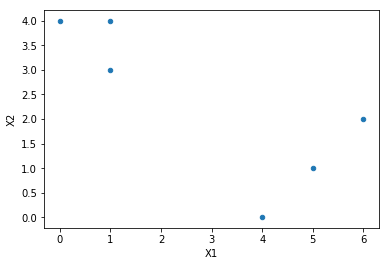

In [3]:
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(X.X1, X.X2, s=20);

*Step 1: Randomly assign a number, from 1 to K, to each of the observations. These serve as initial cluster assignments for the observations.*

In [4]:
X['ClassLabel'] = np.array([1, 1, 2, 2, 1, 2]) 
X

,X1,X2,ClassLabel
0,1,4,1
1,1,3,1
2,0,4,2
3,5,1,2
4,6,2,1
5,4,0,2


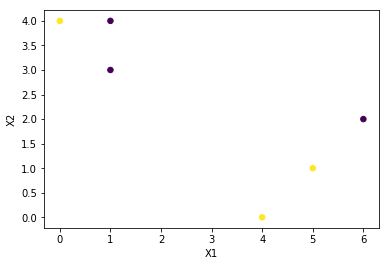

In [5]:
plt.scatter(X.X1, X.X2, s=30, c=X['ClassLabel'])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Step 2: Compute the centroid for each cluster
   
There are two classes, so two centroids:

$centroid1 = [(1+1+6)/3 , (3+4+2)/3 ] = (2.6667, 3)$

$centroid2 = [(0+5+4)/3 , (4+1+0)/3 ] = (3,1.667)$

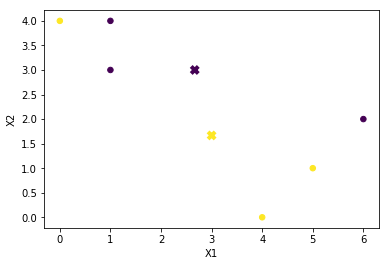

In [6]:
plt.scatter(X.X1, X.X2, s=30, c=X['ClassLabel'])
plt.scatter(np.array([2.6667, 3]), np.array([3,1.667]), s=50, lw=4, c=[1,2],marker='x')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

-----

Step 3: Assign each observation to the centroid to which it is closest, in terms of Euclidean Distance. 

$Find\ Euclidean\ Distance$

|Features|Centroid|=|Euclidean Distance|Cluster Assignment|
|-----|---------|-|------|-----|
|(1,4)<br>(1,4)|(2.667,3)<br>(3,1.667)|=|1.9439<br>3.070651|Assign to C1|
|(1,3)<br>(1,3)|(2.667,3)<br>(3,1.667)|=|1.67<br>2.4018|Assign to C1|
|(0,4)<br>(0,4)|(2.667,3)<br>(3,1.667)|=|2.851123<br>3.798539|Assign to C1|
|(5,1)<br>(5,1)|(2.667,3)<br>(3,1.667)|=|3.06651<br>2.1092|Assign to C2|
|(6,2)<br>(6,2)|(2.667,3)<br>(3,1.667)|=|3.47961<br>3.018095|Assign to C2|
|(4,0)<br>(4,0)|(2.667,3)<br>(3,1.667)|=|3.2816<br>1.94651|Assign to C2|


-----

Step 4: Repeat 2 and 3 until the answers stop changing.
        
   Compute the centroid for each cluster

There are two classes, so two centroids:

$centroid1 = [(1+1+0)/3 , (4+3+4)/3 ] = (0.6667, 3.6667)$

$centroid2 = [(5+6+4)/3 , (1+2+0)/3 ] = (5,1)$

----

Step 5: Assign each observation to the centroid to which it is closest, in terms of Euclidean Distance. 

$Find\ Euclidean\ Distance$

|Features|Centroid|=|Euclidean Distance|Cluster Assignment|
|-----|---------|-|------|-----|
|(1,4)<br>(1,4)|(0.6667, 3.6667)<br>(5,1)|=|0.46669<br>5|Assign to C1|
|(1,3)<br>(1,3)|(0.6667, 3.6667)<br>(5,1)|=|0.74686<br>4.47213|Assign to C1|
|(0,4)<br>(0,4)|(0.6667, 3.6667)<br>(5,1)|=|0.74686<br>5.830952|Assign to C1|
|(5,1)<br>(5,1)|(0.6667, 3.6667)<br>(5,1)|=|5.087023<br>0|Assign to C2|
|(6,2)<br>(6,2)|(0.6667, 3.6667)<br>(5,1)|=|5.5854<br>1.414214|Assign to C2|
|(4,0)<br>(4,0)|(0.6667, 3.6667)<br>(5,1)|=|4.9555<br>1.414214|Assign to C2|

<br>
<center>DONE - Cluster assignment didn't change</center>

------

In [7]:
#Final Class labels
X['ClassLabel'] = np.array([1, 1, 1, 2, 2, 2])
X

,X1,X2,ClassLabel
0,1,4,1
1,1,3,1
2,0,4,1
3,5,1,2
4,6,2,2
5,4,0,2


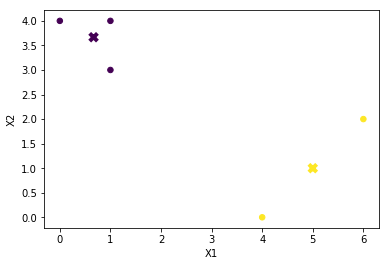

In [8]:
plt.scatter(X.X1, X.X2, s=30, c=X['ClassLabel'])
plt.scatter(np.array([0.6667, 5]), np.array([3.6667,1]), s=60, c=[1,2], lw=4, marker='x')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [9]:
#Above example on Scikit Learn
X = np.array([[1,4],[1,3],[0,4],[5,1],[6,2],[4,0]])
kmeans = KMeans(n_clusters=2, random_state=10,n_init=1).fit(X)
#n_init=1 => Do NOT use this except for this demo.  
#n_init is Number of time the k-means algorithm will be run with different centroid seeds. 
#The final results will be the best output of n_init consecutive runs in terms of inertia.(sum of within cluster variation)

#If you change random_state - you may get different cluster assignments than the calculation above. 
print(kmeans.labels_)

[0 0 0 1 1 1]


In [10]:
print(kmeans.cluster_centers_)

[[0.66666667 3.66666667]
 [5.         1.        ]]


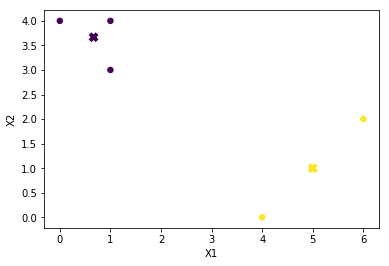

In [11]:
plt.scatter(X[:,0], X[:,1], s=30, c=kmeans.labels_ )
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c=[1,2], lw=4, marker='x')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [12]:
kmeans.inertia_

5.333333333333334

----
```
Sum of within cluster variation (inertia)  [Based on objective function mentioned earlier]  

Pair wise distance (Squared) for cluster 1  

(1,4)(1,3)=1  
(1,4)(0,4)=1
(1,3)(0,4)=2  

Pair wise distance (Squared) for cluster 2  

(5,1)(6,2)=2
(5,1)(4,0)=2
(6,2)(4,0)=8

4/3 + 12/3 =  5.333    Divide by 3 - because we have 3 samples in each cluster
```
------

## K-Means 

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

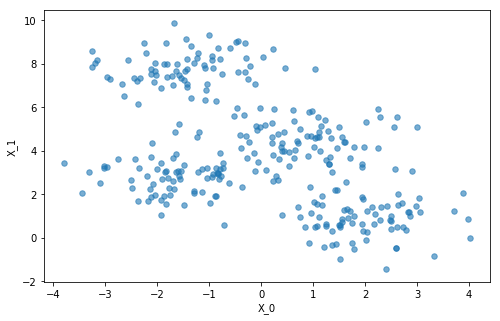

In [13]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.85, random_state=0)
plt.figure(figsize=(8,5))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.6);

In [14]:
df = pd.DataFrame([X[:,0],X[:,1],y_true]).T
df.columns=['X_0','X_1','y']
df[['X_0','X_1']].describe() 


,X_0,X_1
count,300.000000,300.000000
mean,-0.035670,3.959122
std,1.749292,2.658175
min,-3.787200,-1.459040
25%,-1.548379,1.880443
50%,-0.126489,3.538757
75%,1.372155,5.918305
max,4.013597,9.886046


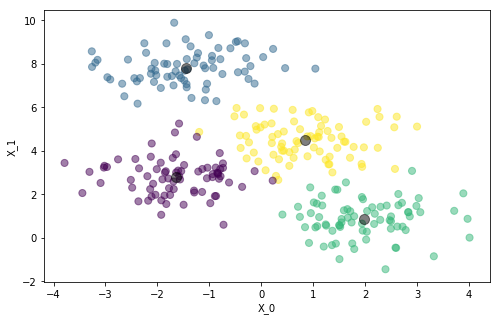

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.5)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.xlabel('X_0')
plt.ylabel('X_1');

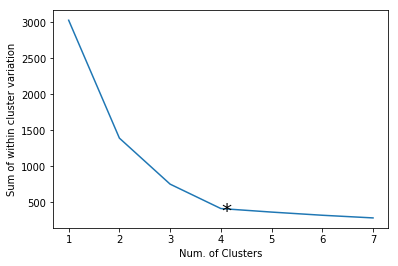

In [16]:
#Evaluating K-Means / How to choose K / Elbow plot

#Goal is to minimize total within cluster variation (inertia)
maxk = 8
arr = np.array(maxk*[0])

for k in range(1,maxk):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0).fit(X)
    arr[k-1]=kmeans.inertia_

fig, ax = plt.subplots()
plt.xlabel("Num. of Clusters")
plt.ylabel("Sum of within cluster variation")
plt.annotate("*",(4,300),size = 20)
plt.plot(range(1,maxk),arr[:maxk-1])
plt.show()

<a id='Silhouette-plots'></a>


Silhouette plots
==========
[Back to top](#top)


[Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) from Scikit-learn.

We can use the silhouette score to evaluate a particular cluster model. Silhouette scores can be used to help evaluate the appropriate number of clusters that are truly in the data. The value that is returned is an indicator of how closely grouped the data is.

The Silhouette Coefficient for each point is calculated using the mean intra-cluster distance ($a$) and the mean nearest-cluster distance ($b$) for each sample point. The Silhouette Coefficient for a point is:  

$$\frac{(b - a)}{ \max (a, b)} $$

The score that is reported is the average of all the sample points.

To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.  

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.  

#### Interpretation
The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.
Values close to 1 mean that the data are appropriately clustered. If the returned value is close to -1 then the data more likely belongs in the neighboring cluster. A value of 0 indicates that the data resides on the border of two natural clusters.

-----

In [17]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters, random_state=0).fit(X)
    classes = kmeans.predict(X)
    print(silhouette_score(X, classes, metric='euclidean'))

0.4702404288401837
0.49854066988898105
0.557089463637127
0.47587646838237085
0.44460585424130394


For n_clusters = 2 The average silhouette_score is : 0.4702404288401837


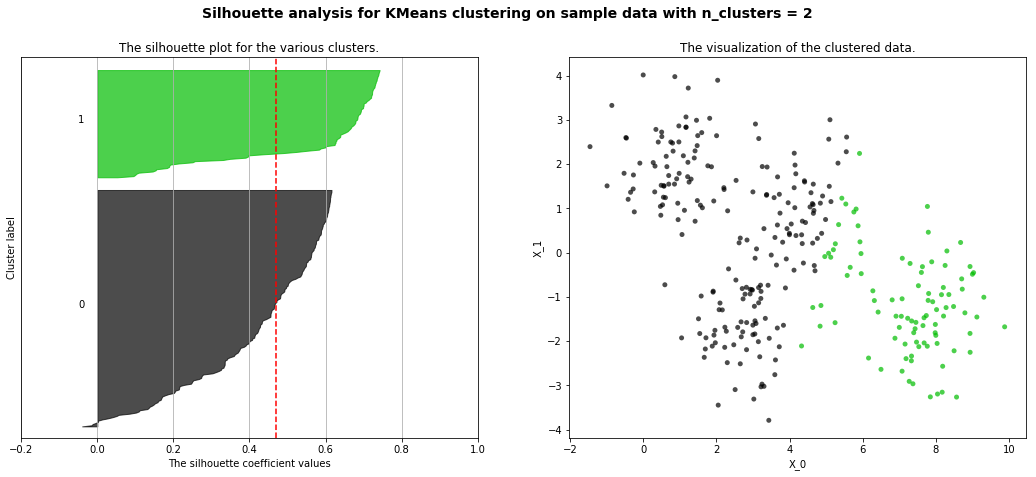

For n_clusters = 3 The average silhouette_score is : 0.49854066988898105


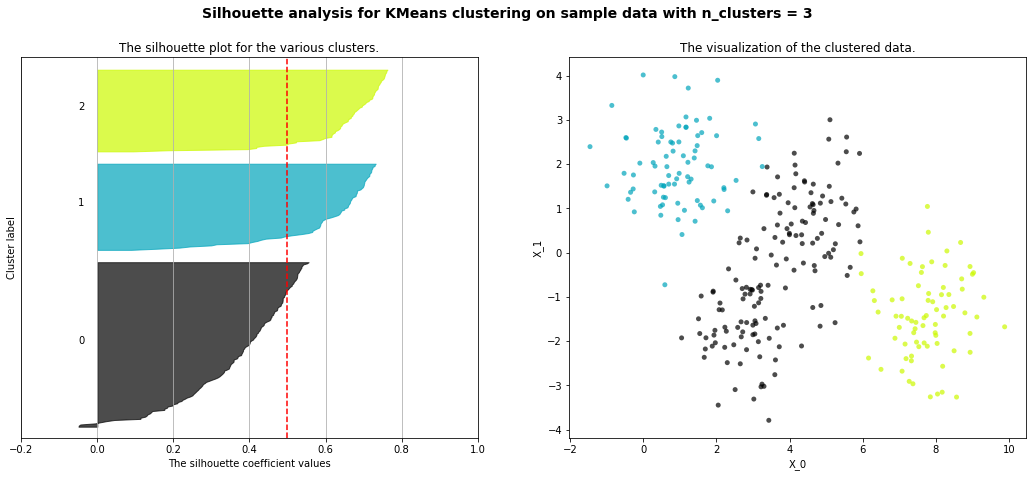

For n_clusters = 4 The average silhouette_score is : 0.557089463637127


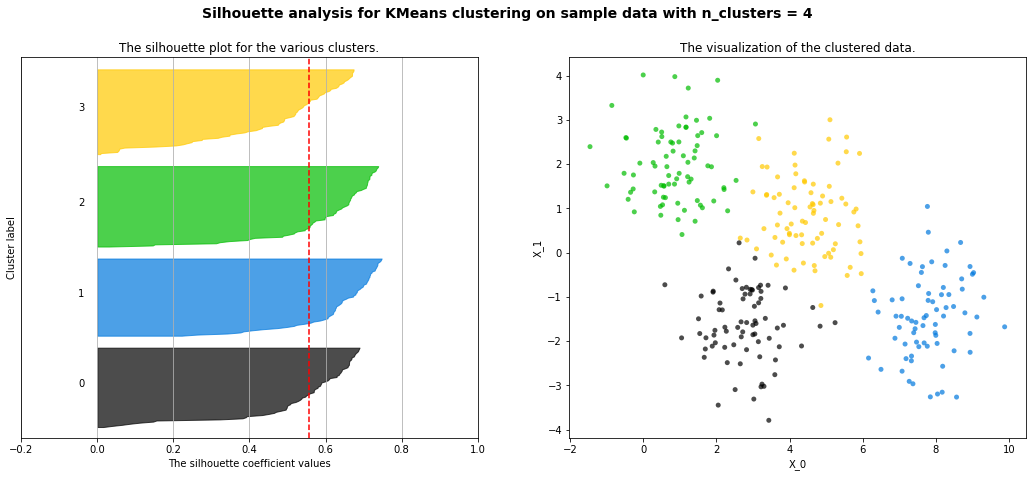

For n_clusters = 5 The average silhouette_score is : 0.4858035507804385


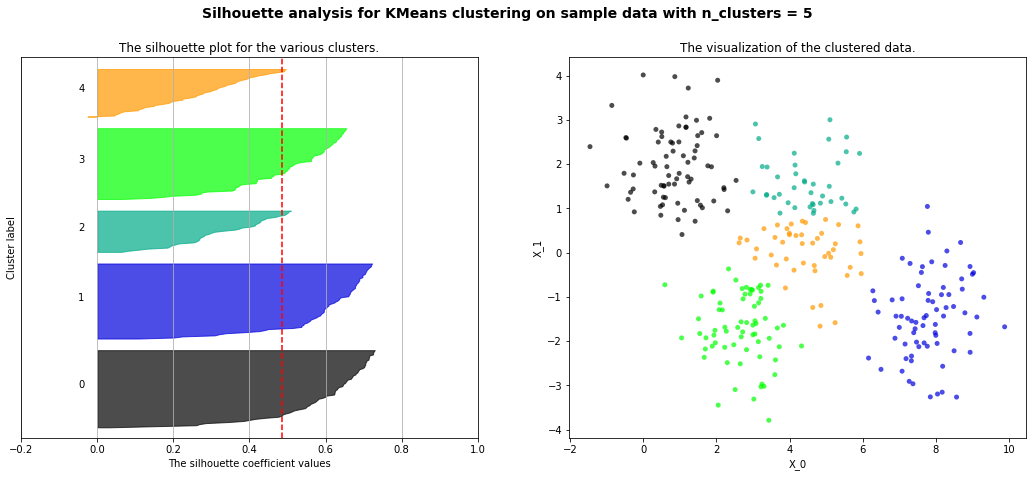

For n_clusters = 6 The average silhouette_score is : 0.4208785262963245


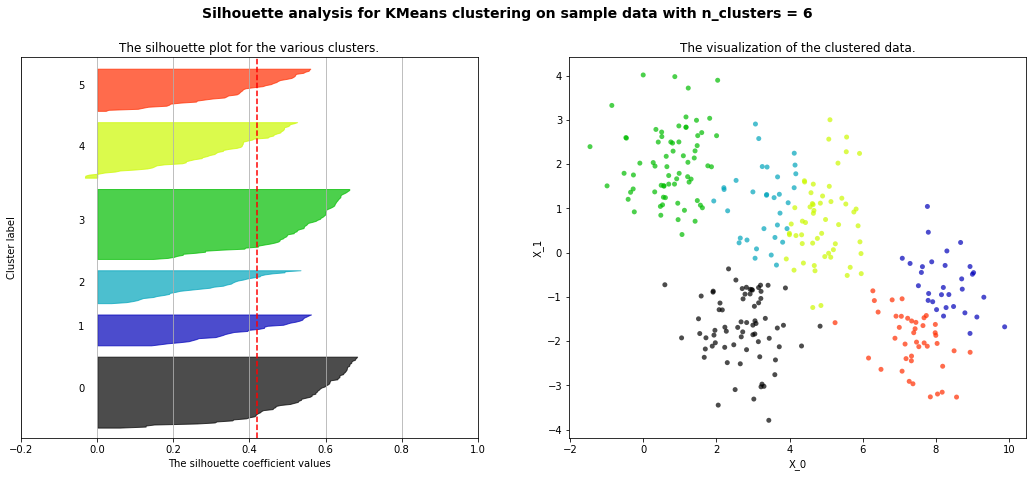

In [18]:
# Taken from the SciKit Learn website examples
# Plots the solhouette scores to check the selection of clusters

def make_silhouette(X_in):
    range_n_clusters = [2, 3, 4, 5, 6]
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_in) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_in)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_in, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_in, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        #ax1.yaxis.set_ticks_position('none')
        #ax1.xaxis.set_ticks_position('none')
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.xaxis.grid(True)
        ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Draw white circles at cluster centers
        centers = clusterer.cluster_centers_
        
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        
        ax2.scatter(X_in[:, 1], X_in[:, 0], marker='.', s=100, lw=0, alpha=0.7, c=colors)
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel('X_0')
        ax2.set_ylabel('X_1')
        ax2.grid(False)

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        #remove_border()
        plt.show()
        
# run the silhouette plotting function
make_silhouette(X)


- Thickness of the horizontal bars correspond to the cluster size. (Ideally pick number of clusters with even size and score above average). 
- Red vertical line is average silhouette score (silhouette coefficient) 

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

<a id ='hierarchicalclustering'> </a>

# Hierarchical Clustering 
[Back to top](#top)


(ISLR - Chapter 10)

Given pairwise dissimilarities between data points, hierarchical clustering produces consistent results, without the need to choose intial starting position or number of clusters (unlike K-means). 
(What do we need to do - ?  We need to choose a way to measure dissimilarity between groups called linkage criteria.) 

Hierarchical clustering can be subdivided into two types:

**Agglomerative clustering** (also known as AGNES (Agglomerative Nesting)) in which, each observation is initially considered as a cluster of its own (leaf). Then, the most similar clusters are successively merged until there is just one single big cluster (root). (We'll look at this one.)

**Divisive clustering**, (DIANA (Divisive Analysis) ) an inverse of agglomerative clustering, begins with the root, in which all objects are included in one cluster. Then the most heterogeneous clusters are successively divided until all observation are in their own cluster.

The result of hierarchical clustering is a tree-based representation of the objects, which is also known as dendrogram.
- Dendrogram is simply a tree, where each node represents a group.
- Each leaf node is a singleton.
- Root node is the group containing whole data set. 
- Each internal node has two children. 
- Cutting the dendrogram horizontally partitions data points into clusters.
The choice of linkage determines how we measure dissimilarity between groups of points.

---- 
The *linkage criteria* determines the metric used for the merge strategy:

- Complete or maximum linkage uses the maximum distances between all observations of the two sets.

- Single linkage uses the minimum distances between all observations of the two sets.

- Average uses the average of the distances of each observation of the two sets.

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

- The four most common types of linkage—complete, average, single, and centroid. Average and complete linkage are generally preferred over single linkage, as they tend to yield more balanced dendrograms. Centroid linkage is often used in genomics, but suffers from a major drawback in that an inversion can occur, whereby two clusters are fused at a height below either of the individual clusters in the dendrogram.


---

### Example - (No Scipy)
ISLR Book Page 413 10.7 Exercise (2) 

Suppose that we have four observations (Point 1, Point 2, Point 3, Point 4), for which we compute a dissimilarity matrix *(Numerical measure of how different two data objects are, 0 to inf - 0 means same point)* , given by :

$$ 
\begin{bmatrix}
0 & 0.3  & 0.4 & 0.7\\ 
0.3 & 0 & 0.5 &0.8 \\ 
0.4 & 0.5 & 0  & 0.45\\ 
0.7 & 0.8 & 0.45 & 0
\end{bmatrix} $$


|   | 1   | 2   | 3    | 4    |
|---|-----|-----|------|------|
| <b>1</b> | 0   | 0.3 | 0.4  | 0.7  |
| <b>2</b> | 0.3 | 0   | 0.5  | 0.8  |
| <b>3</b> | 0.4 | 0.5 | 0    | 0.45 |
| <b>4</b> | 0.7 | 0.8 | 0.45 | 0    |


For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.  0's are for same points i.e. dissimilarity between Point 1 and Point 1.

- We will create a dendrogram based on Complete linkage.
- Interpret the above.


Step 1:

"Complete Linkage: Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities."

The smallest distance is between 1 and 2 and they get linked up or merged first into a the cluster '1-2'. So, merge 1 and 2 at height 0.3. (Record the largest of dissimilarities)



|      |  1-2 |   3 |   4 |
|------|------|------------
| <b>1-2</b>  | 0    | 0.5 | 0.8 |
|  <b>3</b>   | 0.5  | 0   | 0.45|
|  <b>4</b>   | 0.8  |0.45 |  0  |



Step 2: 
Next, the smallest distance is between 3 and 4 - So merge 3 and 4 at height 0.45

|     | 1-2 | 3-4 |
|-----|-----|-----|
| <b>1-2</b> |     |     |
| <b>3-4</b> | 0.8 |     |


Step 3: 
Merge all - Height of the tree = 0.8

**Dendrogram sketch**

<img src='data/complete Linkage.png' , style="width: 400px;"/>

Now we will compare this simple example with scipy.

In [19]:
X =  np.array([[0,0.3,0.4,0.7],[0.3,0,0.5,0.8],[0.4,0.5,0,0.45],[0.7,0.8,0.45,0]])
X

array([[0.  , 0.3 , 0.4 , 0.7 ],
       [0.3 , 0.  , 0.5 , 0.8 ],
       [0.4 , 0.5 , 0.  , 0.45],
       [0.7 , 0.8 , 0.45, 0.  ]])

We will use linkage() from scipy. - https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

linkage() expects - 1d compressed distance matrix or a 2d array of observation vectors. Since we already have a distance matrix we use ssd.squareform to get condensed distance array. 

In [20]:
# convert the redundant n*n square matrix form into a condensed nC2 array 
# This step is not required  when we have data in 2d format as we'll see in next NCI60 example.
distArray = ssd.squareform(X) 
distArray

array([0.3 , 0.4 , 0.7 , 0.5 , 0.8 , 0.45])

In [21]:
# generate the linkage matrix
Z = linkage(distArray, 'complete')  
Z

array([[0.  , 1.  , 0.3 , 2.  ],
       [2.  , 3.  , 0.45, 2.  ],
       [4.  , 5.  , 0.8 , 4.  ]])

Interpreting the Z matrix - 

- Format [index1, index2, distance, number of samples merged]  (indices begin with 0 in python)

     Step 1: - Merged Observation 1 and 2 at height 0.3 

     Step 2: - Merged Observation 3 and 4 at height 0.45

     Step 3: - Merged all at height 0.8. All indices idx >= len(X) refer to the cluster formed in Z[idx - len(X)].  So 4 means cluster formed in Z[4-4] i.e. merged observation 1 and 2 -> Step 1 here. Z[5-4] is Step 2 ie. Merged observations in Step 2. 

- Observe the increasing height of the tree (or distance in 3rd column)

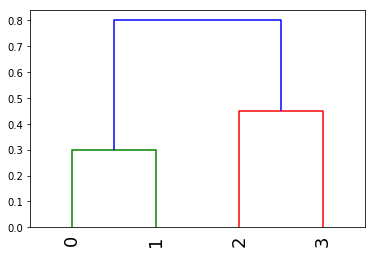

In [22]:
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
); #Compare this to the sketch above

# NCI60 

R - ISLR package (ISLR Book - chapter 10)

NCI microarray data. The data contains expression levels on 6830 genes from 64 cancer cell lines. Cancer type is also recorded. Data is a 64 by 6830 matrix of the expression values while labs is a vector listing the cancer types for the 64 cell lines. Each cell line is labeled with a cancer type.

In [23]:
ncilabs = pd.read_csv('data/ncilabs.csv',index_col=None)
ncidata = pd.read_csv('data/nci60.csv',index_col=None)
print(ncilabs.shape, ncidata.shape)

(64, 1) (64, 6830)


In [24]:
#Frequency count for Cancer types
ncilabs.x.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
MCF7D-repro    1
K562A-repro    1
MCF7A-repro    1
K562B-repro    1
UNKNOWN        1
Name: x, dtype: int64

In [25]:
ncidata.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V6821,V6822,V6823,V6824,V6825,V6826,V6827,V6828,V6829,V6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [26]:
print(ncidata.shape)
#Scaling
std_scale = StandardScaler().fit(ncidata[ncidata.columns])
ncidata[ncidata.columns] = std_scale.transform(ncidata[ncidata.columns])

(64, 6830)


Generate the linkage matrix

In [27]:
Z = linkage(ncidata, 'average')  #defaults => #linkage(y, method='single', metric='euclidean')

Evaluating clustering

In [28]:
#Higher the better (range between 0 to 1)
#https://en.wikipedia.org/wiki/Cophenetic_correlation
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html#scipy.cluster.hierarchy.cophenet
c, coph_dists = cophenet(Z, pdist(ncidata))
c

0.7887903517713147

Plot the dendrogram

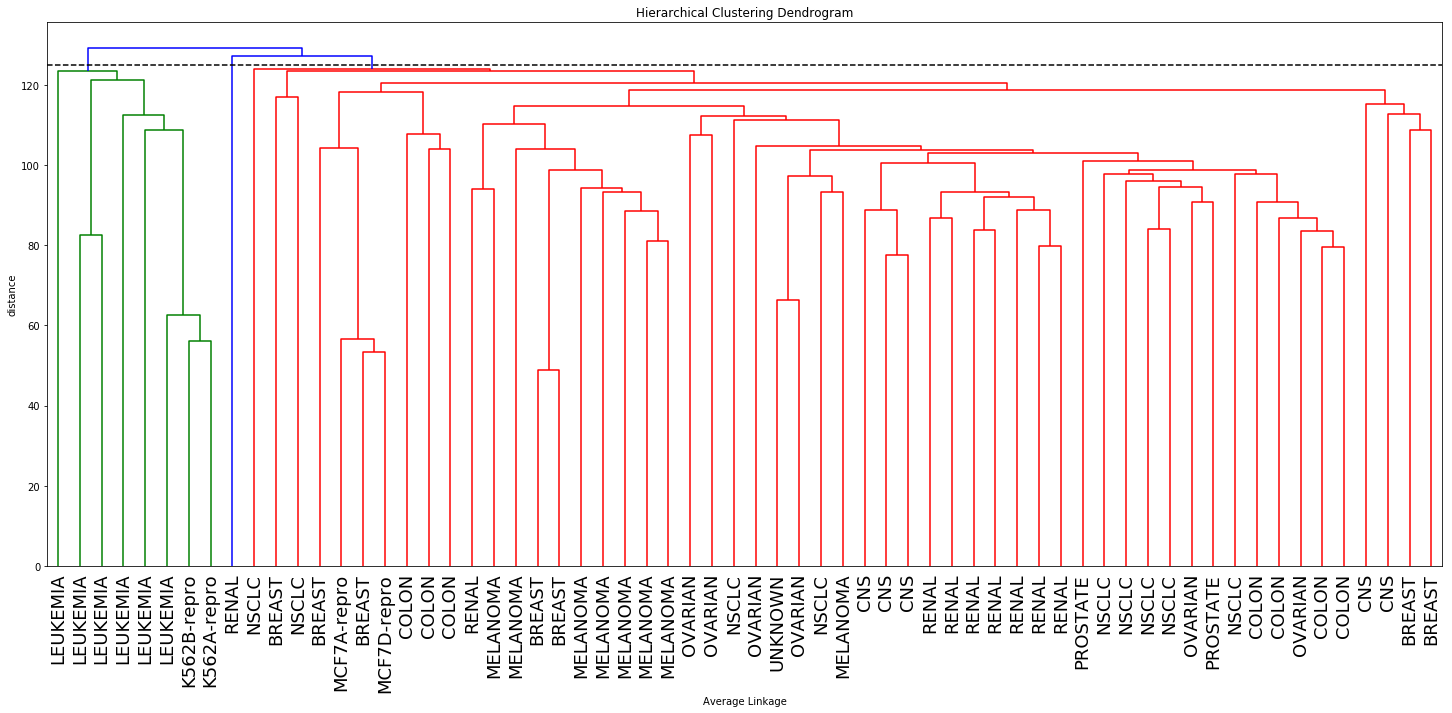

In [29]:
ncidata['ncilabs']=ncilabs.x  ##Labels for x axis
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Average Linkage')
plt.ylabel('distance')
dend = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
    labels= np.array(ncidata.ncilabs), #Labels for x axis
    color_threshold = 125, #np.inf, #125,   #What's 125 ? It is dist. on y axis, cutting the dendrogram horizontally giving 3 clusters
    p = 64,    
)
plt.axhline(y=125, c='k' , linestyle='--')  # Notice the 3 clusters
plt.show() #Output is similar to given in ISLR Book
#list(dend.items())[2][1][1:]

- Cutting the dendrogram horizontally partitions the datapoints into clusters.
- Horizontal lines are cluster merges
- Vertical lines tell you which clusters/labels were part of merge forming that new cluster.
- heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster

In [30]:
#Getting Cluster assignments
cutree = cut_tree(Z, n_clusters=[3]).flatten()
cutree
#Another way to get clusters
#from scipy.cluster.hierarchy import fcluster
#max_d = 125
#clusters = fcluster(Z, max_d, criterion='distance')
#clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
#Getting labels for each of the clusters
nclusters=3
for i in range(nclusters):
    c1 = np.argwhere(cutree==i).flatten()
    print("\nCluster: ",i," ",list(ncilabs.x[c1])) 
    print(c1)


Cluster:  0   ['CNS', 'CNS', 'CNS', 'RENAL', 'BREAST', 'CNS', 'CNS', 'BREAST', 'NSCLC', 'NSCLC', 'RENAL', 'RENAL', 'RENAL', 'RENAL', 'RENAL', 'RENAL', 'RENAL', 'BREAST', 'NSCLC', 'UNKNOWN', 'OVARIAN', 'MELANOMA', 'PROSTATE', 'OVARIAN', 'OVARIAN', 'OVARIAN', 'OVARIAN', 'OVARIAN', 'PROSTATE', 'NSCLC', 'NSCLC', 'NSCLC', 'COLON', 'COLON', 'COLON', 'COLON', 'COLON', 'COLON', 'COLON', 'MCF7A-repro', 'BREAST', 'MCF7D-repro', 'BREAST', 'NSCLC', 'NSCLC', 'NSCLC', 'MELANOMA', 'BREAST', 'BREAST', 'MELANOMA', 'MELANOMA', 'MELANOMA', 'MELANOMA', 'MELANOMA', 'MELANOMA']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 27 28 29 30 31 32 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63]

Cluster:  1   ['RENAL']
[19]

Cluster:  2   ['LEUKEMIA', 'K562B-repro', 'K562A-repro', 'LEUKEMIA', 'LEUKEMIA', 'LEUKEMIA', 'LEUKEMIA', 'LEUKEMIA']
[33 34 35 36 37 38 39 40]


In [32]:
#Plotting original data 
#fig, ax = plt.subplots(3,1,figsize=(16,12))
#ax[0].plot(np.arange(0,6830),np.array(ncidata.iloc[33,0:6830]).T, );
#ax[0].plot(np.arange(0,6830),np.array(ncidata.iloc[34,0:6830]).T, );

#ax[1].plot(np.arange(0,6830),np.array(ncidata.iloc[19,0:6830]).T, );

#ax[2].plot(np.arange(0,6830),np.array(ncidata.iloc[0,0:6830]).T, );
#ax[2].plot(np.arange(0,6830),np.array(ncidata.iloc[1,0:6830]).T, );


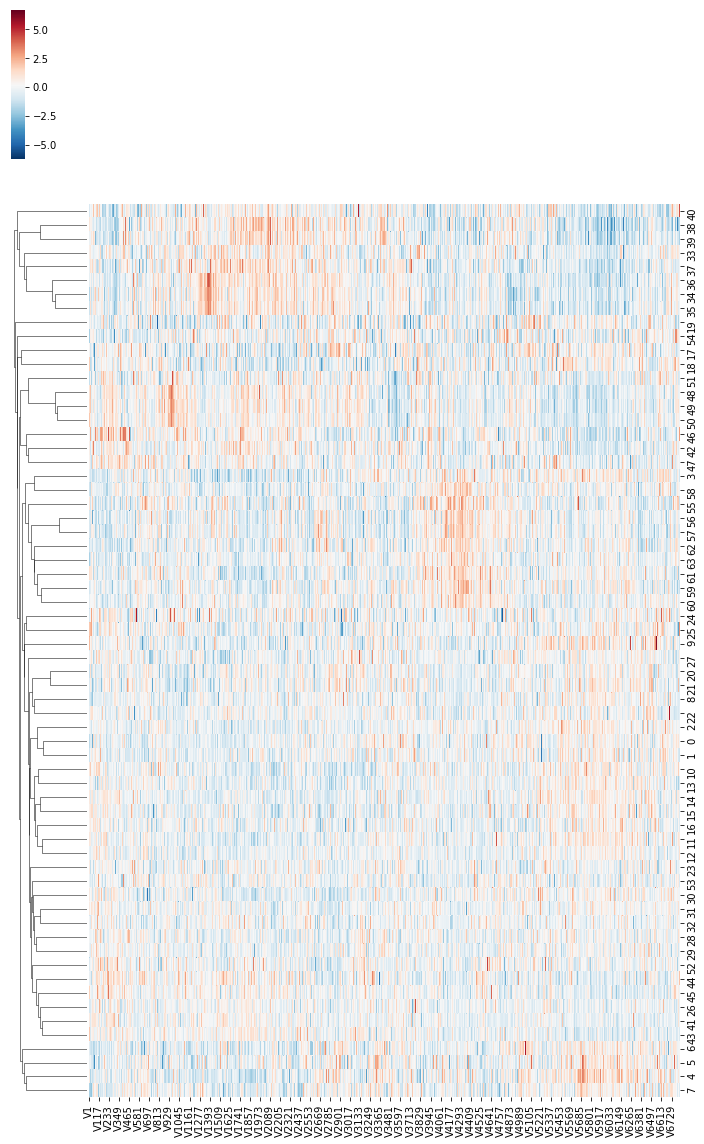

In [33]:
#Seaborn Clustermap - hierarchically-clustered heatmap
sns.clustermap(ncidata.iloc[:,0:6830],cmap="RdBu_r",method='average',figsize=(12,20),col_cluster=False); 
#col_cluster=False i.e. cluster only rows

Y axis on the right has all these observations together - [33 34 35 36 37 38 39 40] (Similar to what we got from scipy)



### Single Linkage

Cophenetic distance: 0.7451720184024931


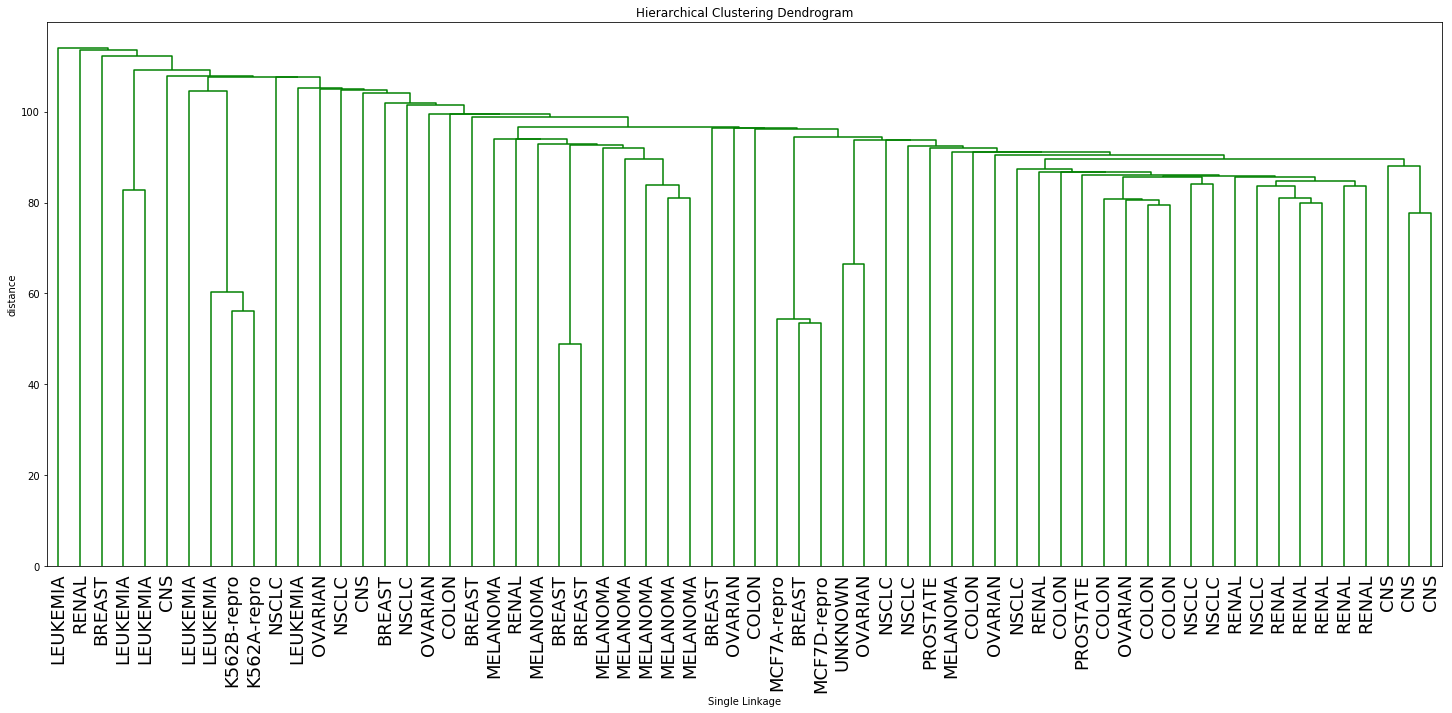

In [34]:
ncidata.drop('ncilabs',axis=1,inplace=True) #Dropping the column that we added for plotting dendrogram
Z = linkage(ncidata, 'single')
c, coph_dists = cophenet(Z, pdist(ncidata))
print("Cophenetic distance:",c)

ncidata['ncilabs']=ncilabs.x  ##Labels for x axis
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Single Linkage')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
    labels= np.array(ncidata.ncilabs), #Labels for x axis
    color_threshold = np.inf,
    p = 64
)
#plt.axhline(y=125, c='k' , linestyle='--')  # Notice the 3 clusters
plt.show() #Output is similar to given in ISLR Book

Single linkage leaves are fused one by one forming a chain. In order to merge two groups only need one pair of points to be close, irrespective of all others. Therefore clusters can be too spread out, and not compact enough. 

# Complete Linkage

0.6670700846202806


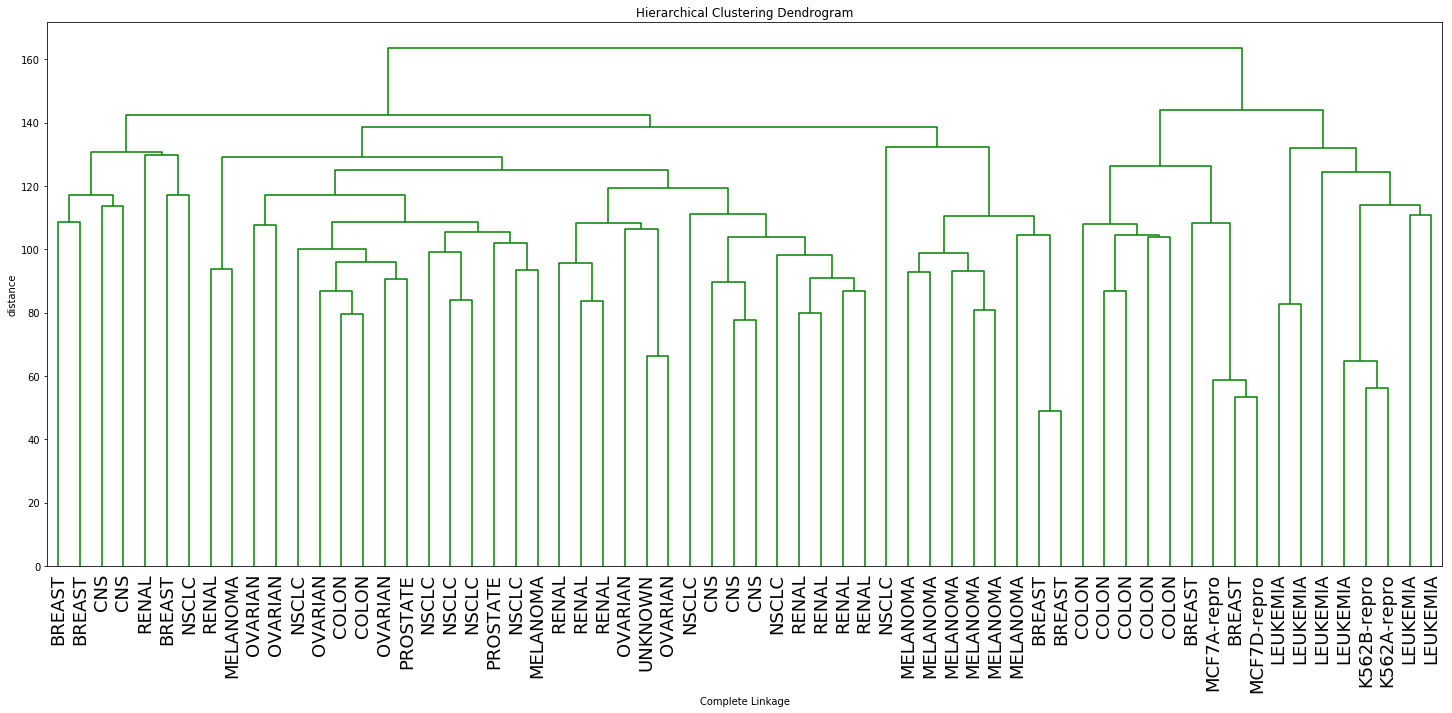

In [35]:
ncidata.drop('ncilabs',axis=1,inplace=True) #Dropping the column that we added for plotting dendrogram
Z = linkage(ncidata, 'complete')
c, coph_dists = cophenet(Z, pdist(ncidata))
print(c)

ncidata['ncilabs']=ncilabs.x  ##Labels for x axis
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Complete Linkage')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
    labels= np.array(ncidata.ncilabs), #Labels for x axis
    color_threshold = np.inf,
    p = 64
)
#plt.axhline(y=125, c='k' , linestyle='--')  # Notice the 3 clusters
plt.show() #Output is similar to given in ISLR Book

Complete linkage avoids chaining but suffers from crowding. Because its score is based on the worst case dissimilarity between pairs, a point can be closer to points in other clusters than to points in its own cluster. Clusters are compact but not far enough apart. 

<a id='gmm'></a>

[Back to top](#top)

### Gaussian Mixture Models

http://www.sthda.com/english/articles/30-advanced-clustering/104-model-based-clustering-essentials/  (R based)


https://www.youtube.com/watch?v=ZBLyXgjBx3Q  - IIT Video  - Explains math really well


https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

https://www.youtube.com/watch?v=W0XECm4-3LI


### Why mixture models? 

K-means is non-probabilistic and its use of simple distance from cluster center to assign cluster membership leads to poor performance for many real-world situations.

k-means clusters  must be circular, k-means has no built-in way of accounting for oblong or elliptical clusters. 



### Gaussian Mixture Models (Model based Clustering)

It considers the data as coming from a distribution that is mixture of two or more clusters (Fraley and Raftery 2002, Fraley et al. (2012)). Unlike k-means, the model-based clustering uses a soft assignment, where each data point has a probability of belonging to each cluster.

- Assumes the number of clusters (mixture components) is known to be $K$.

Each component (i.e. cluster) k is modeled by the normal or Gaussian distribution which is characterized by the parameters:

$\mu k:$ mean vector, <br>
$\sum k:$ covariance matrix, <br>
$w_k:$ mixture weights


Under the hood, a Gaussian mixture model is very similar to k-means: it uses an expectation–maximization approach which qualitatively does the following:


EM Algorithm 

- Intialize parameters (Choose starting guesses for the location and shape)

- Repeat until converged:
    
    E-step: for each point, find weights encoding the probability of membership in each cluster. <br>
    
    M-step: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights




## Old faithful dataset 

```
Old Faithful Geyser Data

Description: (From R manual):

     Waiting time between eruptions and the duration of the eruption
     for the Old Faithful geyser in Yellowstone National Park, Wyoming,
     USA.

     A data frame with 272 observations on 2 variables.

eruptions  numeric  Eruption time in mins
waiting    numeric  Waiting time to next eruption

References:

     Hardle, W. (1991) Smoothing Techniques with Implementation in S.
     New York: Springer.

     Azzalini, A. and Bowman, A. W. (1990). A look at some data on the
     Old Faithful geyser. Applied Statistics 39, 357-365.

```

In [36]:
#Data Source http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat
old_faithful = pd.read_csv('data/old_faithful.csv')
old_faithful.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


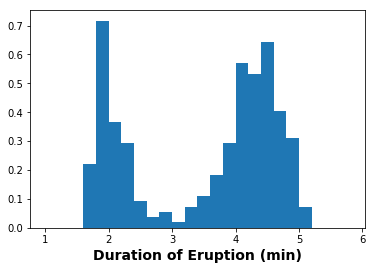

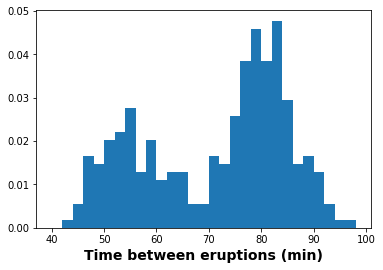

In [37]:
plt.hist(old_faithful.eruptions, bins = np.arange(1,6,.2), density=True )
plt.xlabel('Duration of Eruption (min)', fontsize=14, fontweight='bold')
plt.show()
plt.hist(old_faithful.waiting, bins = np.arange(40,100,2), density=True)
plt.xlabel('Time between eruptions (min)', fontsize=14, fontweight='bold')
plt.show()

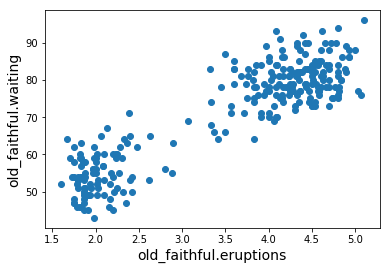

In [38]:
x, y = np.array(old_faithful.eruptions), np.array(old_faithful.waiting)
plt.scatter(x,y)
plt.xlabel('old_faithful.eruptions', fontsize=14)
plt.ylabel('old_faithful.waiting', fontsize=14);
#Higher eruption time corresponds to higher waiting time.

In [39]:
clf = GaussianMixture(n_components=2, random_state=10)
clf.fit(old_faithful.values) 
preds = clf.predict_proba(old_faithful.values) 
#clf.aic or clf.bic can be used to determine n_components

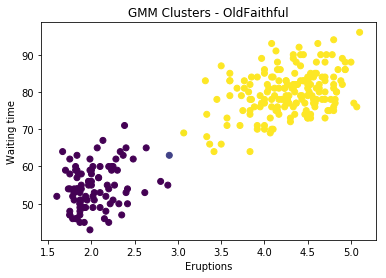

In [40]:
plt.scatter(old_faithful.eruptions, old_faithful.waiting, c=preds[:,1]);
plt.xlabel('Eruptions')
plt.ylabel('Waiting time');
plt.title('GMM Clusters - OldFaithful');

#Plot Ellipsoids - http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#sphx-glr-auto-examples-mixture-plot-gmm-py

The idea is that similar colors are grouped to use the same color.

<a id = 'meanshift'> </a>
# Mean Shift

[Back to top](#top)


Ref: Artificial Intelligence with Python  - Prateek Joshi
 
Mean Shift is a powerful algorithm used in unsupervised learning. It is a non-parametric algorithm used frequently for clustering. It is non-parametric because it does not make any assumptions about the underlying distributions. This is in contrast to parametric techniques, where we assume that the underlying data follows a standard probability distribution. Mean Shift finds a lot of applications in fields like object tracking and real-time data analysis.

In the Mean Shift algorithm, we consider the whole feature space as a probability density function. We start with the training dataset and assume that they have been sampled from a probability density function. In this framework, the clusters correspond to the local maxima of the underlying distribution. If there are K clusters, then there are K peaks in the underlying data distribution and Mean Shift will identify those peaks.

The goal of Mean Shift is to identify the location of centroids. For each data point in the training dataset, it defines a window around it. It then computes the centroid for this window and updates the location to this new centroid. It then repeats the process for this new location by defining a window around it. As we keep doing this, we move closer to the peak of the cluster. Each data point will move towards the cluster it belongs to. The movement is towards a region of higher density.

We keep shifting the centroids, also called means, towards the peaks of each cluster. Since we keep shifting the means, it is called Mean Shift! We keep doing this until the algorithm converges, at which stage the centroids don't move anymore.

In [41]:
#https://github.com/log0/build-your-own-meanshift/blob/master/Meanshift%20Image%20Segmentation.ipynb


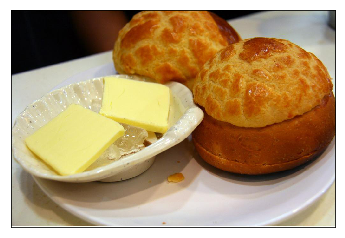

In [42]:
image = Image.open('data/bread.jpg')

# Image is (687 x 1025, RGB channels)
image = np.array(image)
original_shape = image.shape

# Flatten image.
X = np.reshape(image, [-1, 3])

plt.imshow(image)
plt.xticks([])
plt.yticks([]);

*Bandwidth Parameter* 

Bandwidth is a parameter of the underlying kernel density estimation process used in Mean Shift algorithm. The bandwidth affects the overall convergence rate of the algorithm and the number of clusters that we will end up with in the end. Hence this is a crucial parameter. If the bandwidth is small, it might results in too many clusters, where as if the value is large, then it will merge distinct clusters.

The quantile parameter impacts how the bandwidth is estimated. A higher value for quantile will increase the estimated bandwidth, resulting in a lesser number of clusters:

In [43]:
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)
print(bandwidth)

35.65543473376919


In [44]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=35.65543473376919, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [45]:
labels = ms.labels_
print(labels.shape)
cluster_centers = ms.cluster_centers_
print(cluster_centers.shape)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Number of estimated clusters : %d" % n_clusters_)

(704175,)
(6, 3)
Number of estimated clusters : 6


In [46]:
original_shape,original_shape[:2]

((687, 1025, 3), (687, 1025))

In [47]:
segmented_image = np.reshape(labels, original_shape[:2])  # Just take size, ignore RGB channels.

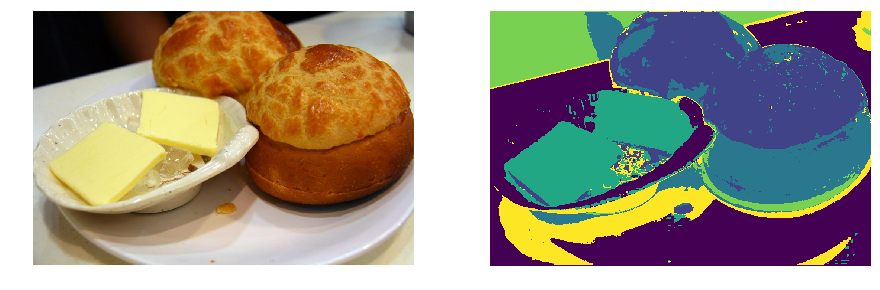

In [48]:
f, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(image)
axs[0].axis('off')
axs[1].imshow(segmented_image)
axs[1].axis('off');

#The idea is that similar colors are grouped to use the same color.